# Projet Networks

### A - Préparation des données

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np  

In [3]:
# 1. Chargement des données
nodes = pd.read_csv("nodes_cluster_C.csv",sep=";")
edges = pd.read_csv("edges_cluster_C.csv",sep=";")
print(nodes.head())
print(edges.head())

      id  coord  core  gender
0   7467      0     0       0
1  63089      0     0       0
2   7471      0     0       1
3  81353      0     0       1
4  80891      0     0       1
   source  target  pre_link  post_link
0    7467    2694         1          0
1   63089    7418         1          1
2   80891    7418         0          1
3   43119    7418         0          1
4  115654    7418         0          1


In [4]:
# 2. Nettoyage : ne garder qu'une apparition de chaque dyade
edges_unique = edges[edges['source'] < edges['target']]

In [5]:
len(edges_unique)

741

In [7]:
# 3. Création des graphes pour chaque période
pre_edges = edges_unique[edges_unique['pre_link'] == 1]   # Sélection des arêtes actives avant l'intervention
post_edges = edges_unique[edges_unique['post_link'] == 1] # Sélection des arêtes actives après l'intervention

G_avant = nx.Graph()   # Création du graphe non orienté pour la période "pré"
G_apres = nx.Graph()  # Création du graphe non orienté pour la période "post"

# Ajouter les noeuds avec attributs
for _, row in nodes.iterrows(): #on neglige l'index avec _ 
    G_avant.add_node(row['id'], gender=row['gender'], core=row['core'], coord=row['coord'])   # Ajout d'un nœud dans G_avant avec ses attributs
    G_apres.add_node(row['id'], gender=row['gender'], core=row['core'], coord=row['coord'])  # Ajout du même nœud dans G_apres avec les mêmes attributs

# Ajouter les arêtes (liens)
G_avant.add_edges_from(pre_edges[['source', 'target']].values)   # Ajout des arêtes dans G_avant à partir des colonnes source et target
G_apres.add_edges_from(post_edges[['source', 'target']].values) # Ajout des arêtes dans G_apres à partir des colonnes source et target

### B - Analyse des réseaux avant et après traitement

#### B.1 - Analyse avant traitement

In [8]:
print("Nombre de nœuds :", G_avant.number_of_nodes())
print("Nombre de liens :", G_avant.number_of_edges())

# Densité = nb de liens existants / nb de liens possibles
print("Densité :", nx.density(G_avant))

# Degré moyen = somme des degrés / nombre de nœuds
degres_avant = dict(G_avant.degree())
print("Degré moyen :", sum(degres_avant.values()) / G_avant.number_of_nodes())

# Nombre de composantes connexes (sous-graphes séparés)
print("Nombre de composantes connexes :", nx.number_connected_components(G_avant))

# Taille de la plus grande composante connexe (composante géante)
print("Taille composante géante :", len(max(nx.connected_components(G_avant), key=len)))

# Nombre de chercheurs isolés (degré 0 dans G_avant)
print("Chercheurs isolés :", len([n for n in G_avant.nodes if G_avant.degree(n) == 0]))

# Clustering moyen local (moyenne du taux de formation de triangles pour chaque nœud)
print("Clustering moyen :", nx.average_clustering(G_avant))

# Clustering global (transitivité = rapport triangles / triplets)
print("Clustering global :", nx.transitivity(G_avant))

# Calcul de la longueur moyenne des plus courts chemins (sur la composante géante uniquement)
giant_component = G_avant.subgraph(max(nx.connected_components(G_avant), key=len))
print("Longueur moyenne des plus courts chemins :", nx.average_shortest_path_length(giant_component))

Nombre de nœuds : 215
Nombre de liens : 363
Densité : 0.01577917843946968
Degré moyen : 3.3767441860465115
Nombre de composantes connexes : 85
Taille composante géante : 111
Chercheurs isolés : 74
Clustering moyen : 0.2678090599650827
Clustering global : 0.4844989185291997
Longueur moyenne des plus courts chemins : 3.707780507780508


#### C.2 - Analyse après traitement

In [10]:
print("Nombre de nœuds :", G_apres.number_of_nodes())
print("Nombre de liens :", G_apres.number_of_edges())

# Densité = nb de liens existants / nb de liens possibles
print("Densité :", nx.density(G_apres))

# Degré moyen = somme des degrés / nombre de nœuds
degres_apres = dict(G_apres.degree())
print("Degré moyen :", sum(degres_apres.values()) / G_apres.number_of_nodes())

# Nombre de composantes connexes (sous-graphes séparés)
print("Nombre de composantes connexes :", nx.number_connected_components(G_apres))

# Taille de la plus grande composante connexe (composante géante)
print("Taille composante géante :", len(max(nx.connected_components(G_apres), key=len)))

# Nombre de chercheurs isolés (degré 0 dans G_apres)
print("Chercheurs isolés :", len([n for n in G_avant.nodes if G_apres.degree(n) == 0]))

# Clustering moyen local (moyenne du taux de formation de triangles pour chaque nœud)
print("Clustering moyen :", nx.average_clustering(G_apres))

# Clustering global (transitivité = rapport triangles / triplets)
print("Clustering global :", nx.transitivity(G_apres))

# Calcul de la longueur moyenne des plus courts chemins (sur la composante géante uniquement)
giant_component = G_apres.subgraph(max(nx.connected_components(G_apres), key=len))
print("Longueur moyenne des plus courts chemins :", nx.average_shortest_path_length(giant_component))

Nombre de nœuds : 215
Nombre de liens : 581
Densité : 0.025255379265377093
Degré moyen : 5.404651162790698
Nombre de composantes connexes : 41
Taille composante géante : 138
Chercheurs isolés : 26
Clustering moyen : 0.4218331436640951
Clustering global : 0.558700546799614
Longueur moyenne des plus courts chemins : 3.7203004337247436


### C - Analyse des composantes géantes

#### C.1 - Analyse avant traitement

In [11]:
components_avant = list(nx.connected_components(G_avant)) # Liste des composantes
giant_avant = max(components_avant, key=len) # Trouver la composante géante (la plus grande)

print('Taille composante géante avant traitement :', len(giant_avant)) # Taille de la composante géante

# Pourcentage de la population dans la composante
pourcentage_giant_avant = len(giant_avant) / G_avant.number_of_nodes() * 100
print('Pourcentage dans composante géante avant traitement :', pourcentage_giant_avant, '%')
Giant_avant = G_avant.subgraph(giant_avant)
distance_moyenne_avant = nx.average_shortest_path_length(Giant_avant)

print('Distance moyenne dans la composante géante avant traitement :', distance_moyenne_avant)

Taille composante géante avant traitement : 111
Pourcentage dans composante géante avant traitement : 51.627906976744185 %
Distance moyenne dans la composante géante avant traitement : 3.707780507780508


#### C.2 - Analyse après traitement

In [12]:
components_apres = list(nx.connected_components(G_apres))
giant_apres = max(components_apres, key=len)

print('\nTaille composante géante après traitement :', len(giant_apres))
pourcentage_giant_apres = len(giant_apres) / G_apres.number_of_nodes() * 100
print('Pourcentage dans composante géante après traitement :', pourcentage_giant_apres, '%')
Giant_apres = G_apres.subgraph(giant_apres)
distance_moyenne_apres = nx.average_shortest_path_length(Giant_apres)

print('Distance moyenne dans la composante géante après traitement :', distance_moyenne_apres)


Taille composante géante après traitement : 138
Pourcentage dans composante géante après traitement : 64.18604651162791 %
Distance moyenne dans la composante géante après traitement : 3.7203004337247436


### D - Pourcentage de paires accessibles en ≤ h sauts

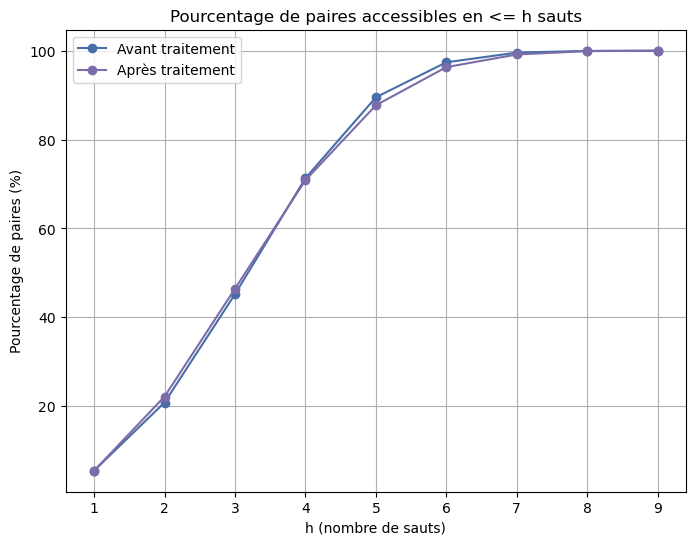

In [13]:
# 1. Calcul des distances AVANT traitement
distances_avant = dict(nx.all_pairs_shortest_path_length(Giant_avant))  # Dictionnaire des plus courts chemins entre toutes les paires de noeuds du graphe avant traitement
all_distances_avant = []  # Liste pour stocker toutes les distances entre les paires de noeuds

for source in distances_avant:  # Parcours de chaque noeud source
    for target, d in distances_avant[source].items():  # Pour chaque noeud cible, on récupère la distance
        if source != target:  # On exclut les distances à soi-même (0)
            all_distances_avant.append(d)  # On stocke la distance dans la liste

h_max_avant = max(all_distances_avant)  # Profondeur maximale (plus grande distance observée)
percentages_avant = []  # Liste pour stocker les pourcentages cumulés

for h in range(1, h_max_avant + 1):  # Pour chaque valeur de h (nombre de sauts)
    proportion = np.sum(np.array(all_distances_avant) <= h) / len(all_distances_avant)  # Proportion de paires connectées en <= h sauts
    percentages_avant.append(proportion * 100)  # Conversion en pourcentage et ajout à la liste

# 2. Calcul des distances APRES traitement (même logique)
distances_apres = dict(nx.all_pairs_shortest_path_length(Giant_apres))  # Distances dans le graphe après traitement
all_distances_apres = []

for source in distances_apres:
    for target, d in distances_apres[source].items():
        if source != target:
            all_distances_apres.append(d)

h_max_apres = max(all_distances_apres)  # Profondeur maximale après traitement
percentages_apres = []

for h in range(1, h_max_apres + 1):
    proportion = np.sum(np.array(all_distances_apres) <= h) / len(all_distances_apres)
    percentages_apres.append(proportion * 100)

# 3. Trace des deux courbes sur le même graphique
h_max_total = max(h_max_avant, h_max_apres)  # Profondeur maximale globale pour le graphique

plt.figure(figsize=(8, 6))  # Taille de la figure
plt.plot(range(1, h_max_avant + 1), percentages_avant, marker='o', color='#486EAA', label='Avant traitement')  # Courbe "avant"
plt.plot(range(1, h_max_apres + 1), percentages_apres, marker='o', color='#7C6CA9', label='Après traitement')  # Courbe "après"

plt.title('Pourcentage de paires accessibles en <= h sauts')  # Titre du graphique
plt.xlabel('h (nombre de sauts)')  # Légende axe x
plt.ylabel('Pourcentage de paires (%)')  # Légende axe y
plt.legend()  # Affichage de la légende
plt.grid(True)  # Grille
plt.show()  # Affichage du graphique

### E - Distribution du degré

####  E.1 - Histogrammes et distribution log-log du degre

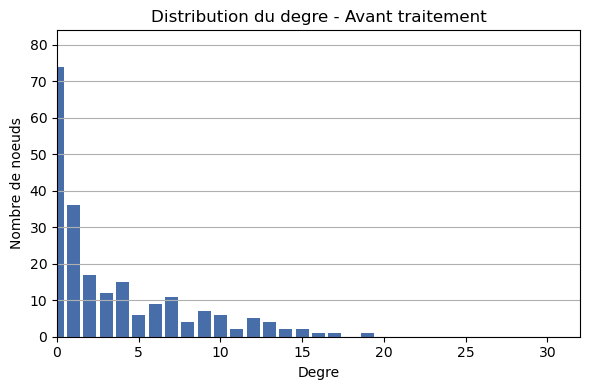

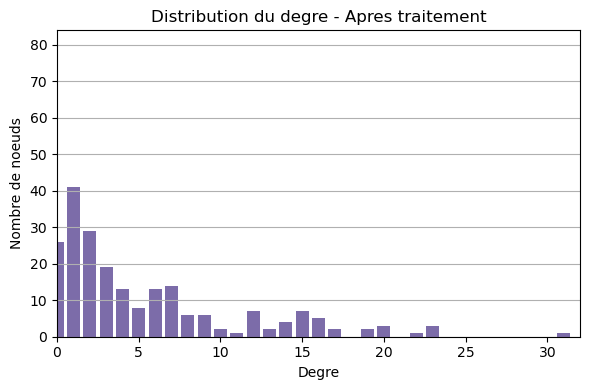

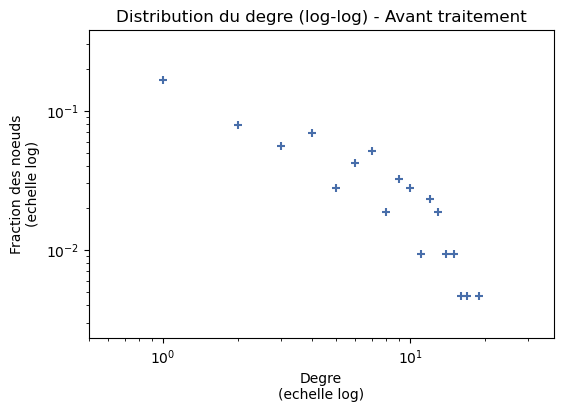

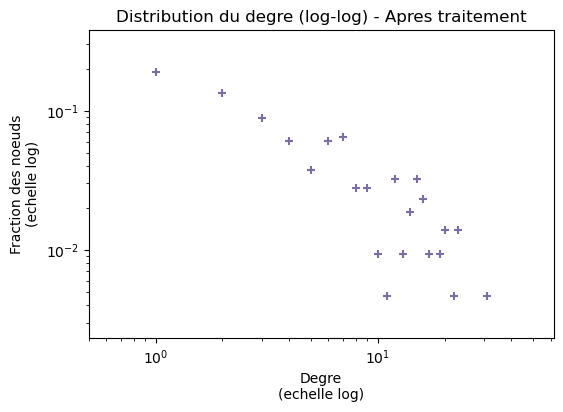

In [14]:
# === Histogramme des degres - AVANT ===
degree_count_avant = nx.degree_histogram(G_avant)  # nombre de noeuds par degre (index = degre)
degree_avant = list(range(len(degree_count_avant)))  # liste des degres possibles
hist_data_avant = (degree_avant, degree_count_avant)  # tuple pour l’affichage

# === Histogramme des degres - APRES ===
degree_count_apres = nx.degree_histogram(G_apres)
degree_apres = list(range(len(degree_count_apres)))
hist_data_apres = (degree_apres, degree_count_apres)

# === Bornes communes ===
ymax = max(max(degree_count_avant), max(degree_count_apres)) + 10  # meme echelle Y avec une marge
xmax = max(len(degree_count_avant), len(degree_count_apres))  # meme echelle X (degre max)

# === Affichage - AVANT ===
plt.figure(figsize=(6, 4))
plt.bar(*hist_data_avant, color='#486EAA')  # histogramme
plt.title('Distribution du degre - Avant traitement')
plt.xlabel('Degre')
plt.ylabel('Nombre de noeuds')
plt.ylim(0, ymax)  # echelle Y uniforme
plt.xlim(0, xmax)  # echelle X uniforme
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Affichage - APRES ===
plt.figure(figsize=(6, 4))
plt.bar(*hist_data_apres, color='#7C6CA9')
plt.title('Distribution du degre - Apres traitement')
plt.xlabel('Degre')
plt.ylabel('Nombre de noeuds')
plt.ylim(0, ymax)
plt.xlim(0, xmax)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Distribution log-log - AVANT ===
total_nodes_avant = G_avant.number_of_nodes()  # total de noeuds dans le graphe
degree_distribution_avant = {}  # dictionnaire : degre -> frequence (%)

for k, v in enumerate(degree_count_avant):
    if v > 0 and k > 0:  # on elimine les zeros (log(0) interdit)
        degree_distribution_avant[k] = v / total_nodes_avant

x_axis_avant = list(degree_distribution_avant.keys())
y_axis_avant = list(degree_distribution_avant.values())

# === Distribution log-log - APRES ===
total_nodes_apres = G_apres.number_of_nodes()
degree_distribution_apres = {}

for k, v in enumerate(degree_count_apres):
    if v > 0 and k > 0:
        degree_distribution_apres[k] = v / total_nodes_apres

x_axis_apres = list(degree_distribution_apres.keys())
y_axis_apres = list(degree_distribution_apres.values())

# === Echelle log-log commune ===
ymin = min(min(y_axis_avant), min(y_axis_apres))
ymax = max(max(y_axis_avant), max(y_axis_apres))

# === Affichage log-log - AVANT ===
plt.figure(figsize=(6, 4))
plt.title('Distribution du degre (log-log) - Avant traitement')
plt.xlabel('Degre\n(echelle log)')
plt.ylabel('Fraction des noeuds\n(echelle log)')
plt.xscale("log", base=10)
plt.yscale("log", base=10)
plt.xlim(min(x_axis_avant) / 2, max(x_axis_avant) * 2)  # on fait /2 et *2 pour agrandir l’echelle
plt.ylim(ymin / 2, ymax * 2)
plt.scatter(x_axis_avant, y_axis_avant, color='#486EAA', s=30, marker='+')
plt.show()

# === Affichage log-log - APRES ===
plt.figure(figsize=(6, 4))
plt.title('Distribution du degre (log-log) - Apres traitement')
plt.xlabel('Degre\n(echelle log)')
plt.ylabel('Fraction des noeuds\n(echelle log)')
plt.xscale("log", base=10)
plt.yscale("log", base=10)
plt.xlim(min(x_axis_apres) / 2, max(x_axis_apres) * 2)
plt.ylim(ymin / 2, ymax * 2)
plt.scatter(x_axis_apres, y_axis_apres, color='#7C6CA9', s=30, marker='+')
plt.show()

#### E.2 - Ajustement d une loi de puissance

In [18]:
# !pip install powerlaw

Values less than or equal to 0 in data. Throwing out 0 or negative values


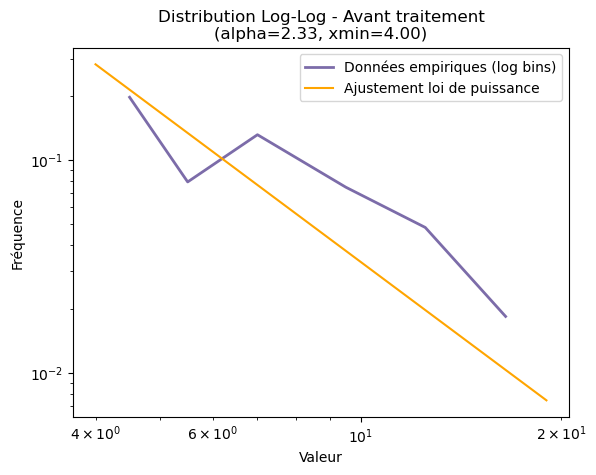

Values less than or equal to 0 in data. Throwing out 0 or negative values


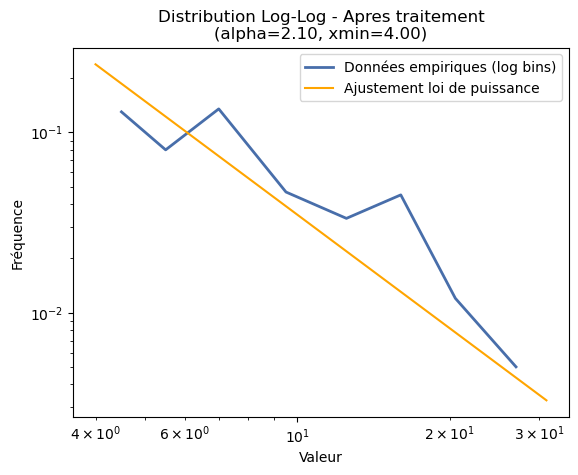

In [17]:
import powerlaw

# === Ajustement - AVANT traitement ===
data = [d for n, d in G_avant.degree()]  # Extraire les degrés du graphe avant traitement
# Ajustement d'une loi de puissance par maximum de vraisemblance (xmin fixé à 4)
fit = powerlaw.Fit(data, discrete=True, xmin=4, fit_method='Likelihood')
# Paramètres estimés : alpha (exposant), xmin (seuil), sigma (erreur standard)
alpha, xmin, sigma = fit.alpha, fit.xmin, fit.sigma
# Trace log-log : données empiriques + ajustement
fig, ax = plt.subplots()
fit.plot_pdf(ax=ax, color="#7C6CA9", linewidth=2, label='Données empiriques (log bins)')
fit.power_law.plot_pdf(ax=ax, color='orange', linestyle='-', label='Ajustement loi de puissance')
ax.set_title(f'Distribution Log-Log - Avant traitement\n(alpha={alpha:.2f}, xmin={xmin:.2f})')
ax.set_xlabel('Valeur')
ax.set_ylabel('Fréquence')
ax.legend()
plt.show()

# === Ajustement - APRES traitement ===
data = [d for n, d in G_apres.degree()]  # Extraire les degrés du graphe après traitement
# Ajustement d'une loi de puissance par maximum de vraisemblance (xmin fixé à 4)
fit = powerlaw.Fit(data, discrete=True, xmin=4, fit_method='Likelihood')
# Paramètres estimés : alpha (exposant), xmin (seuil), sigma (erreur standard)
alpha, xmin, sigma = fit.alpha, fit.xmin, fit.sigma
# Trace log-log : données empiriques + ajustement
fig, ax = plt.subplots()
fit.plot_pdf(ax=ax, color="#486EAA", linewidth=2, label='Données empiriques (log bins)')
fit.power_law.plot_pdf(ax=ax, color='orange', linestyle='-', label='Ajustement loi de puissance')
ax.set_title(f'Distribution Log-Log - Apres traitement\n(alpha={alpha:.2f}, xmin={xmin:.2f})')
ax.set_xlabel('Valeur')
ax.set_ylabel('Fréquence')
ax.legend()
plt.show()

### F - Attachement Préférenciel

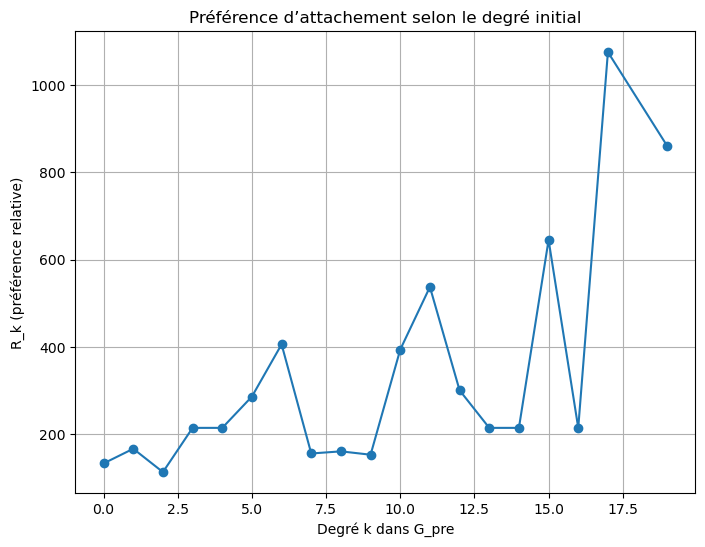

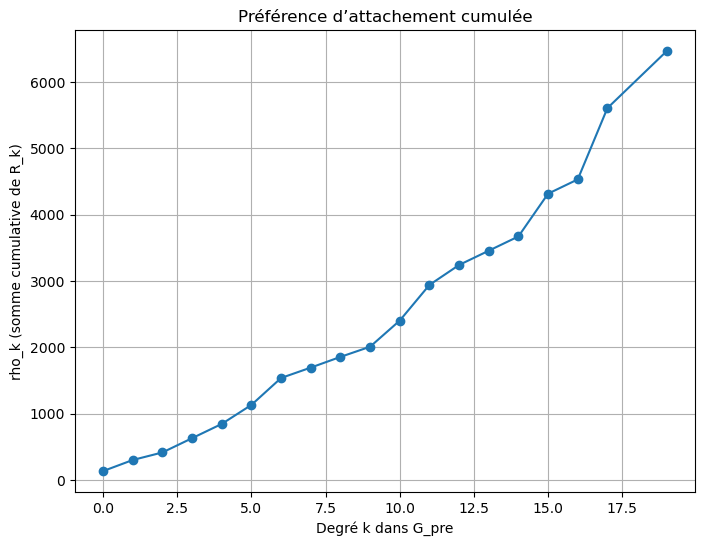

In [19]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# 1. Noeuds isolés dans G_avant
isolated_nodes = [n for n in G_avant.nodes() if G_avant.degree(n) == 0]

# 2. Noeuds actifs (avant isolés, après connectés)
activated_nodes = [n for n in isolated_nodes if G_apres.degree(n) > 0]

# 3. Compter les connexions selon le degré k des cibles (dans G_avant)
k_targets = []
seen_pairs = set()  # pour éviter les doublons

for node in activated_nodes:
    for neighbor in G_apres.neighbors(node):
        if not G_avant.has_edge(node, neighbor):
            # Créer une paire unique pour éviter les doublons
            pair = tuple(sorted((node, neighbor)))
            if pair not in seen_pairs:
                seen_pairs.add(pair)
                # Maintenant, choisir intelligemment la "cible"
                if neighbor in isolated_nodes:
                    # Si le neighbor est aussi un isolé, on décide arbitrairement : on prend node
                    degree_target = G_avant.degree(node)
                else:
                    degree_target = G_avant.degree(neighbor)
                k_targets.append(degree_target)

# Ensuite : k_targets contient vraiment les degrés des vraies cibles (sans compter deux fois les liens entre isolés)
Pk_counts = Counter(k_targets)

# 4. n_k : nombre de noeuds avec degré k dans G_avant
deg_pre_all = dict(G_avant.degree())
nk_counts = Counter(deg_pre_all.values())

# 5. N : nombre total de noeuds dans G_avant
N_total = G_avant.number_of_nodes()

# 6. Calcul de R_k
Rk = {}
for k in Pk_counts:
    if nk_counts[k] > 0:
        Rk[k] = Pk_counts[k] * N_total / nk_counts[k]

# 7. Visualisation de R_k
plt.figure(figsize=(8,6))
plt.plot(sorted(Rk.keys()), [Rk[k] for k in sorted(Rk)], marker='o')
plt.xlabel("Degré k dans G_pre")
plt.ylabel("R_k (préférence relative)")
plt.title("Préférence d’attachement selon le degré initial")
plt.grid(True)
plt.show()

# 8. Calcul de rho_k (somme cumulative)
# Rk doit être ordonné par k
sorted_ks = sorted(Rk.keys())
sorted_Rk = [Rk[k] for k in sorted_ks]
rho_k = np.cumsum(sorted_Rk)

# Trace de rho_k
plt.figure(figsize=(8,6))
plt.plot(sorted_ks, rho_k, marker='o')
plt.xlabel("Degré k dans G_pre")
plt.ylabel("rho_k (somme cumulative de R_k)")
plt.title("Préférence d’attachement cumulée")
plt.grid(True)
plt.show()

### G - Comparaison avec des réseaux théoriques

In [20]:
# === 1. Choix du reseau reel ===
G_real = G_apres

# === 2. Caracteristiques du reseau reel ===
n = G_real.number_of_nodes()  # nombre de noeuds
m = G_real.number_of_edges()  # nombre d’aretes
density = nx.density(G_real)  # densite du graphe

print(f"Notre reseau : {n} noeuds, {m} aretes, densite {density:.4f}")

# === 3. Generation des graphes de comparaison ===

# a) Graphe aleatoire Erdos-Renyi avec meme n et meme densite
p_er = density
G_er = nx.erdos_renyi_graph(n, p_er)

# b) Graphe small-world Watts-Strogatz avec meme n et degre moyen k ~ 2m/n
k = int(round(2 * m / n))
G_sw = nx.watts_strogatz_graph(n, k, 0.1)

# c) Graphe scale-free Barabasi-Albert avec m’ ~ m/n (liens ajoutes a chaque nouveau noeud)
m_ba = max(1, int(round(m / n)))
G_ba = nx.barabasi_albert_graph(n, m_ba)

# d) Graphe regulier : chaque noeud a degre k (on ajuste k si necessaire)
if (n * k) % 2 != 0:
    k -= 1  # on rend n*k pair
G_reg = nx.random_regular_graph(k, n)

# === 4. Mesure des proprietes des graphes ===

def get_props(G):
    try:
        comp = max(nx.connected_components(G), key=len)
        # plus grande composante connexe
        G_cc = G.subgraph(comp)
        avg_path = nx.average_shortest_path_length(G_cc)
        # longueur moyenne du plus court chemin
    except:
        avg_path = None
    clustering = nx.transitivity(G)  # clustering global
    return avg_path, clustering

# Reel
real_avg, real_clust = get_props(G_real)
# Aleatoire
er_avg, er_clust = get_props(G_er)
# Small-world
sw_avg, sw_clust = get_props(G_sw)
# Scale-free
ba_avg, ba_clust = get_props(G_ba)
# Regulier
reg_avg, reg_clust = get_props(G_reg)

# === 5. Tableau comparatif ===

df_compare = pd.DataFrame({
    'Type': ['Reel', 'Aleatoire (ER)', 'Small-World (WS)', 'Scale-Free (BA)', 'Regulier (k-regular)'],
    'Avg Shortest Path': [real_avg, er_avg, sw_avg, ba_avg, reg_avg],
    'Global Clustering': [real_clust, er_clust, sw_clust, ba_clust, reg_clust]
})

print("\nComparaison des proprietes :")
print(df_compare)

Notre reseau : 215 noeuds, 581 aretes, densite 0.0253

Comparaison des proprietes :
                   Type  Avg Shortest Path  Global Clustering
0                  Reel           3.720300           0.558701
1        Aleatoire (ER)           3.348403           0.026349
2      Small-World (WS)           6.399652           0.347630
3       Scale-Free (BA)           2.984612           0.047872
4  Regulier (k-regular)           4.242208           0.013953


### H - Analyse par genre

In [22]:
# Proportions hommes/femmes
prop_gender = nodes['gender'].value_counts(normalize=True)
print(f"Proportion d’hommes (0) : {prop_gender.get(0, 0):.3f} ({prop_gender.get(0, 0)*100:.1f}%)")
print(f"Proportion de femmes (1) : {prop_gender.get(1, 0):.3f} ({prop_gender.get(1, 0)*100:.1f}%)")

# 1. Identifier les individus isoles dans G_avant ou G_apres
isolated_nodes_pre = list(nx.isolates(G_avant))
isolated_nodes_post = list(nx.isolates(G_apres))

# 2. Joindre avec les attributs pour connaitre leur genre
isolated_pre_df = nodes[nodes['id'].isin(isolated_nodes_pre)]
isolated_post_df = nodes[nodes['id'].isin(isolated_nodes_post)]

# 3. Calculer les totaux par genre
total_femmes = (nodes['gender'] == 1).sum()
total_hommes = (nodes['gender'] == 0).sum()

isolated_femmes_pre = (isolated_pre_df['gender'] == 1).sum()
isolated_hommes_pre = (isolated_pre_df['gender'] == 0).sum()

isolated_femmes_post = (isolated_post_df['gender'] == 1).sum()
isolated_hommes_post = (isolated_post_df['gender'] == 0).sum()

# 4. Calculer les pourcentages
pct_femmes_isolees_pre = isolated_femmes_pre / total_femmes * 100
pct_hommes_isoles_pre = isolated_hommes_pre / total_hommes * 100

pct_femmes_isolees_post = isolated_femmes_post / total_femmes * 100
pct_hommes_isoles_post = isolated_hommes_post / total_hommes * 100

# 5. Affichage
print("--- Pourcentage d’isoles par genre---")
print(f"Avant traitement (G_avant) :")
print(f"Femmes isolees : {pct_femmes_isolees_pre:.2f}%")
print(f"Hommes isoles : {pct_hommes_isoles_pre:.2f}%")

print("\nApres traitement (G_apres) :")
print(f"Femmes isolees : {pct_femmes_isolees_post:.2f}%")
print(f"Hommes isoles : {pct_hommes_isoles_post:.2f}%")

# Degres
deg_pre = dict(G_avant.degree())
deg_post = dict(G_apres.degree())

# Creation du DataFrame
df_degree = pd.DataFrame({
    'id': list(deg_pre.keys()),
    'deg_pre': [deg_pre[n] for n in deg_pre],
    'deg_post': [deg_post[n] for n in deg_post]
})

# Ajout de l’information de genre
df_degree = df_degree.merge(nodes[['id', 'gender']], on='id')

# Calcul de l’evolution du degre
df_degree['degree_change'] = df_degree['deg_post'] - df_degree['deg_pre']

# Moyenne des degres avant traitement par genre
mean_pre = df_degree.groupby('gender')['deg_pre'].mean()

# Moyenne des degres apres traitement par genre
mean_post = df_degree.groupby('gender')['deg_post'].mean()

# Evolution moyenne du degre par genre
mean_change = df_degree.groupby('gender')['degree_change'].mean()

# Affichage
print("Degre moyen AVANT traitement :")
print(mean_pre)

print("\nDegre moyen APRES traitement :")
print(mean_post)

print("\nEvolution moyenne du degre (apres - avant) :")
print(mean_change)

# Clustering
clust_pre = nx.clustering(G_avant)
clust_post = nx.clustering(G_apres)

# Creation du DataFrame
df_clust = pd.DataFrame({
    'id': list(clust_pre.keys()),
    'clust_pre': [clust_pre[n] for n in clust_pre],
    'clust_post': [clust_post[n] for n in clust_post]
})

# Ajout de l’information de genre
df_clust = df_clust.merge(nodes[['id', 'gender']], on='id')

# Comparaison femmes vs hommes
result_pre = df_clust.groupby('gender')['clust_pre'].mean()
result_post = df_clust.groupby('gender')['clust_post'].mean()

print("Clustering moyen avant traitement :")
print(result_pre)

print("\nClustering moyen apres traitement :")
print(result_post)

# Centralite
closeness_pre = nx.closeness_centrality(G_avant)
betweenness_pre = nx.betweenness_centrality(G_avant)
closeness_post = nx.closeness_centrality(G_apres)
betweenness_post = nx.betweenness_centrality(G_apres)

df_centrality = pd.DataFrame({
    'id': list(closeness_pre.keys()),
    'closeness_pre': [closeness_pre[n] for n in closeness_pre],
    'betweenness_pre': [betweenness_pre[n] for n in betweenness_pre],
    'closeness_post': [closeness_post[n] for n in closeness_post],
    'betweenness_post': [betweenness_post[n] for n in betweenness_post]
})

df_centrality = df_centrality.merge(nodes[['id', 'gender']], on='id')

mean_closeness_pre = df_centrality.groupby('gender')['closeness_pre'].mean()
mean_closeness_post = df_centrality.groupby('gender')['closeness_post'].mean()
mean_betweenness_pre = df_centrality.groupby('gender')['betweenness_pre'].mean()
mean_betweenness_post = df_centrality.groupby('gender')['betweenness_post'].mean()

print("Closeness moyen avant :", mean_closeness_pre)
print("Closeness moyen apres :", mean_closeness_post)
print("Betweenness moyen avant :", mean_betweenness_pre)
print("Betweenness moyen apres :", mean_betweenness_post)

Proportion d’hommes (0) : 0.772 (77.2%)
Proportion de femmes (1) : 0.228 (22.8%)
--- Pourcentage d’isoles par genre---
Avant traitement (G_avant) :
Femmes isolees : 40.82%
Hommes isoles : 32.53%

Apres traitement (G_apres) :
Femmes isolees : 6.12%
Hommes isoles : 13.86%
Degre moyen AVANT traitement :
gender
0    3.500000
1    2.959184
Name: deg_pre, dtype: float64

Degre moyen APRES traitement :
gender
0    5.120482
1    6.367347
Name: deg_post, dtype: float64

Evolution moyenne du degre (apres - avant) :
gender
0    1.620482
1    3.408163
Name: degree_change, dtype: float64
Clustering moyen avant traitement :
gender
0    0.286001
1    0.206180
Name: clust_pre, dtype: float64

Clustering moyen apres traitement :
gender
0    0.419930
1    0.428282
Name: clust_post, dtype: float64
Closeness moyen avant : gender
0    0.077384
1    0.069382
Name: closeness_pre, dtype: float64
Closeness moyen apres : gender
0    0.114841
1    0.132410
Name: closeness_post, dtype: float64
Betweenness moyen a

### I - Recherche d’un nœud central à la manière d’Erdős

In [24]:
# Top 10 degres dans G_avant
top_degres_avant = sorted(G_avant.degree, key=lambda x: x[1], reverse=True)[:10]
print("Top 10 degre avant traitement :")
for node, deg in top_degres_avant:
    print(f"Chercheur {node} - Degre : {deg}")

# Top 10 degres dans G_apres
top_degres_apres = sorted(G_apres.degree, key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 degre apres traitement :")
for node, deg in top_degres_apres:
    print(f"Chercheur {node} - Degre : {deg}")

# Closeness dans G_avant
closeness_avant = nx.closeness_centrality(G_avant)
top_closeness_avant = sorted(closeness_avant.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 closeness avant traitement :")
for node, closeness in top_closeness_avant:
    print(f"Chercheur {node} - Closeness : {closeness}")

# Closeness dans G_apres
closeness_apres = nx.closeness_centrality(G_apres)
top_closeness_apres = sorted(closeness_apres.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 closeness apres traitement :")
for node, closeness in top_closeness_apres:
    print(f"Chercheur {node} - Closeness : {closeness}")

# Betweenness dans G_avant
betweenness_avant = nx.betweenness_centrality(G_avant)
top_betweenness_avant = sorted(betweenness_avant.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 betweenness avant traitement :")
for node, betweenness in top_betweenness_avant:
    print(f"Chercheur {node} - Betweenness : {betweenness}")

# Betweenness dans G_apres
betweenness_apres = nx.betweenness_centrality(G_apres)
top_betweenness_apres = sorted(betweenness_apres.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 betweenness apres traitement :")
for node, betweenness in top_betweenness_apres:
    print(f"Chercheur {node} - Betweenness : {betweenness}")

Top 10 degre avant traitement :
Chercheur 7463 - Degre : 19
Chercheur 9938 - Degre : 17
Chercheur 36929 - Degre : 16
Chercheur 43544 - Degre : 15
Chercheur 9881 - Degre : 15
Chercheur 80891 - Degre : 14
Chercheur 7475 - Degre : 14
Chercheur 36851 - Degre : 13
Chercheur 9886 - Degre : 13
Chercheur 69859 - Degre : 13

Top 10 degre apres traitement :
Chercheur 43551 - Degre : 31
Chercheur 7463 - Degre : 23
Chercheur 9925 - Degre : 23
Chercheur 43544 - Degre : 23
Chercheur 80891 - Degre : 22
Chercheur 9928 - Degre : 20
Chercheur 9938 - Degre : 20
Chercheur 9882 - Degre : 20
Chercheur 43539 - Degre : 19
Chercheur 85232 - Degre : 19

Top 10 closeness avant traitement :
Chercheur 43544 - Closeness : 0.20635786888600857
Chercheur 9938 - Closeness : 0.20265969919271093
Chercheur 7463 - Closeness : 0.1949726071543667
Chercheur 43552 - Closeness : 0.19231991862165426
Chercheur 7475 - Closeness : 0.18910386647079044
Chercheur 72071 - Closeness : 0.18660744579130809
Chercheur 9945 - Closeness : 0.1

### J - Homophilie(assortativité)

#### J.1 - Homophilie par genre

In [25]:
# Assortativite par genre
assort_genre_avant = nx.attribute_assortativity_coefficient(G_avant, 'gender')
print("Assortativite par genre avant traitement :", assort_genre_avant)

assort_genre_apres = nx.attribute_assortativity_coefficient(G_apres, 'gender')
print("Assortativite par genre apres traitement :", assort_genre_apres)

# Degres selon le genre
deg_avant, deg_apres = dict(G_avant.degree()), dict(G_apres.degree())
gen_avant = nx.get_node_attributes(G_avant, 'gender')
gen_apres = nx.get_node_attributes(G_apres, 'gender')

f_avant = [deg_avant[n] for n in G_avant if gen_avant.get(n) == 1]
m_avant = [deg_avant[n] for n in G_avant if gen_avant.get(n) == 0]
f_apres = [deg_apres[n] for n in G_apres if gen_apres.get(n) == 1]
m_apres = [deg_apres[n] for n in G_apres if gen_apres.get(n) == 0]

# Moyennes et taux
moy_f_avant, moy_f_apres = np.mean(f_avant), np.mean(f_apres)
moy_m_avant, moy_m_apres = np.mean(m_avant), np.mean(m_apres)

taux_f = (moy_f_apres - moy_f_avant) / moy_f_avant * 100
taux_m = (moy_m_apres - moy_m_avant) / moy_m_avant * 100

print(f"Taux d’augmentation du degre moyen des femmes : {taux_f:.2f}%")
print(f"Taux d’augmentation du degre moyen des hommes : {taux_m:.2f}%")

Assortativite par genre avant traitement : 0.043432844679209374
Assortativite par genre apres traitement : -0.02529411764705872
Taux d’augmentation du degre moyen des femmes : 115.17%
Taux d’augmentation du degre moyen des hommes : 46.30%


#### J.2- Homophilie par appartenance au noyau (core)

In [26]:
# Assortativite par core
assort_core_avant = nx.attribute_assortativity_coefficient(G_avant, 'core')
print("Assortativite par core avant traitement :", assort_core_avant)

assort_core_apres = nx.attribute_assortativity_coefficient(G_apres, 'core')
print("Assortativite par core apres traitement :", assort_core_apres)

# Degres selon core
deg_avant, deg_apres = dict(G_avant.degree()), dict(G_apres.degree())
core_avant = nx.get_node_attributes(G_avant, 'core')
core_apres = nx.get_node_attributes(G_apres, 'core')

core_avant_vals = [deg_avant[n] for n in G_avant if core_avant.get(n) == 1]
noncore_avant_vals = [deg_avant[n] for n in G_avant if core_avant.get(n) == 0]
core_apres_vals = [deg_apres[n] for n in G_apres if core_apres.get(n) == 1]
noncore_apres_vals = [deg_apres[n] for n in G_apres if core_apres.get(n) == 0]

# Moyennes et taux
moy_core_av = np.mean(core_avant_vals)
moy_core_ap = np.mean(core_apres_vals)
moy_nc_av = np.mean(noncore_avant_vals)
moy_nc_ap = np.mean(noncore_apres_vals)

taux_core = (moy_core_ap - moy_core_av) / moy_core_av * 100
taux_nc = (moy_nc_ap - moy_nc_av) / moy_nc_av * 100

print(f"Taux d’augmentation du degre moyen-Core : {taux_core:.2f}%")
print(f"Taux d’augmentation du degre moyen-Non-core : {taux_nc:.2f}%")

Assortativite par core avant traitement : 0.1543092922403264
Assortativite par core apres traitement : 0.1733259771182992
Taux d’augmentation du degre moyen-Core : 14.53%
Taux d’augmentation du degre moyen-Non-core : 68.80%


 ### K - Détection de communautés (Louvain)

In [28]:
# Avant choc
partition_pre = community.louvain_communities(G_avant, resolution=0.7, seed=123)
nb_communities_pre = len(partition_pre)
print("Nombre de communautés détectées avant le choc :", nb_communities_pre)

# Après 
partition_post = community.louvain_communities(G_apres, resolution=0.7, seed=123)
nb_communities_post = len(partition_post)
print("Nombre de communautés détectées après le choc :", nb_communities_post)

Nombre de communautés détectées avant le choc : 91
Nombre de communautés détectées après le choc : 45


In [29]:
# Nombre de communautes de taille >= 2
nb_communautes_size_2plus = sum(1 for c in partition_pre if len(c) >= 2)
print(f"Nombre de communautes de taille >= 2 avant le choc : {nb_communautes_size_2plus}")

nb_communautes_post_2plus = sum(1 for c in partition_post if len(c) >= 2)
print(f"Nombre de communautes >= 2 apres le choc : {nb_communautes_post_2plus}")

# Total de femmes dans le reseau (sert a calculer le % de femmes captees)
total_f = nodes[nodes['gender'] == 1].shape[0]

# Fonction pour afficher les stats d’une liste de communautes
def afficher_stats_communautes(partition, top_k, titre):
    print(f"\n{titre}")
    for i, comm in enumerate(sorted(partition, key=len, reverse=True)[:top_k], 1):
        df = nodes[nodes['id'].isin(comm)]  # Sous-ensemble des individus dans la communaute
        n = len(df)  # Taille de la communaute
        if n == 0:
            print(f"- Com {i} : vide")  # Eviter division par zero
            continue
        f = (df['gender'] == 1).sum()  # Nombre de femmes
        c = (df['core'] == 1).sum()    # Nombre de membres core
        # Affichage du nombre de noeuds, % de femmes, % de core, % de femmes captees
        print(f"- Com {i} : {n} noeuds | % femmes : {f / n * 100:.1f}% | % core : {c / n * 100:.1f}% | femmes captees : {f / total_f * 100:.1f}%")

# Appel pour les communautes avant et apres traitement
afficher_stats_communautes(partition_pre, 17, "Top 17 communautes AVANT le choc")
afficher_stats_communautes(partition_post, 19, "Top 19 communautes APRES le choc")

Nombre de communautes de taille >= 2 avant le choc : 17
Nombre de communautes >= 2 apres le choc : 19

Top 17 communautes AVANT le choc
- Com 1 : 30 noeuds | % femmes : 26.7% | % core : 10.0% | femmes captees : 16.3%
- Com 2 : 29 noeuds | % femmes : 17.2% | % core : 31.0% | femmes captees : 10.2%
- Com 3 : 20 noeuds | % femmes : 10.0% | % core : 25.0% | femmes captees : 4.1%
- Com 4 : 14 noeuds | % femmes : 14.3% | % core : 7.1% | femmes captees : 4.1%
- Com 5 : 8 noeuds | % femmes : 25.0% | % core : 0.0% | femmes captees : 4.1%
- Com 6 : 7 noeuds | % femmes : 42.9% | % core : 0.0% | femmes captees : 6.1%
- Com 7 : 7 noeuds | % femmes : 28.6% | % core : 14.3% | femmes captees : 4.1%
- Com 8 : 5 noeuds | % femmes : 0.0% | % core : 0.0% | femmes captees : 0.0%
- Com 9 : 4 noeuds | % femmes : 50.0% | % core : 0.0% | femmes captees : 4.1%
- Com 10 : 3 noeuds | % femmes : 33.3% | % core : 0.0% | femmes captees : 2.0%
- Com 11 : 2 noeuds | % femmes : 0.0% | % core : 0.0% | femmes captees : 0

### L - Analyse du noyau (core)

In [30]:
# ====== AVANT ======

# Construction du DataFrame : chaque noeud de G_avant devient une ligne avec son degre
data_avant = pd.DataFrame.from_dict(dict(G_avant.degree()), orient='index', columns=['degree'])

# Ajout de l’attribut ’core’ (1 si core, 0 sinon) pour chaque noeud
data_avant['core'] = pd.Series(nx.get_node_attributes(G_avant, 'core'))

# Affichage du degre moyen des membres core et non-core
print("Degre moyen par core-AVANT")
print(data_avant.groupby('core')['degree'].mean())


# ====== APRES ======

# Meme construction pour G_apres : degre et attribut core
data_apres = pd.DataFrame.from_dict(dict(G_apres.degree()), orient='index', columns=['degree'])
data_apres['core'] = pd.Series(nx.get_node_attributes(G_apres, 'core'))

# Affichage du degre moyen par core
print("\nDegre moyen par core-APRES")
print(data_apres.groupby('core')['degree'].mean())


# ====== Chercheurs isoles ======

# Ajout d’une colonne ’isole’ : True si le degre est nul (degre == 0)
data_avant['isole'] = data_avant['degree'] == 0
data_apres['isole'] = data_apres['degree'] == 0

# Proportion d’isoles par core (moyenne de la colonne booleenne)
print("Proportion de chercheurs isoles par core-AVANT")
print(data_avant.groupby('core')['isole'].mean())

print("\nProportion de chercheurs isoles par core-APRES")
print(data_apres.groupby('core')['isole'].mean())


# ====== Centralites AVANT ======

# Calcul du clustering local pour chaque noeud
data_avant['clustering'] = pd.Series(nx.clustering(G_avant))

# Calcul de la betweenness centrality (centralite d’intermediarite)
data_avant['betweenness'] = pd.Series(nx.betweenness_centrality(G_avant))

# Calcul de la closeness centrality (centralite de proximite)
data_avant['closeness'] = pd.Series(nx.closeness_centrality(G_avant))


# ====== Centralites APRES ======

data_apres['clustering'] = pd.Series(nx.clustering(G_apres))
data_apres['betweenness'] = pd.Series(nx.betweenness_centrality(G_apres))
data_apres['closeness'] = pd.Series(nx.closeness_centrality(G_apres))


# ====== Moyennes par core ======

# Moyennes des 3 centralites groupees par core (0 ou 1)
print("Mesures centrales- AVANT")
print(data_avant.groupby('core')[['clustering', 'betweenness', 'closeness']].mean())

print("\nMesures centrales- APRES")
print(data_apres.groupby('core')[['clustering', 'betweenness', 'closeness']].mean())

Degre moyen par core-AVANT
core
0    3.205263
1    4.680000
Name: degree, dtype: float64

Degre moyen par core-APRES
core
0    5.410526
1    5.360000
Name: degree, dtype: float64
Proportion de chercheurs isoles par core-AVANT
core
0    0.363158
1    0.200000
Name: isole, dtype: float64

Proportion de chercheurs isoles par core-APRES
core
0    0.126316
1    0.080000
Name: isole, dtype: float64
Mesures centrales- AVANT
      clustering  betweenness  closeness
core                                    
0       0.265505     0.003028   0.070616
1       0.285318     0.006043   0.113139

Mesures centrales- APRES
      clustering  betweenness  closeness
core                                    
0       0.430416     0.005132   0.117708
1       0.356604     0.006303   0.127485


### M - Représentation graphique du réseau avant et après traitement

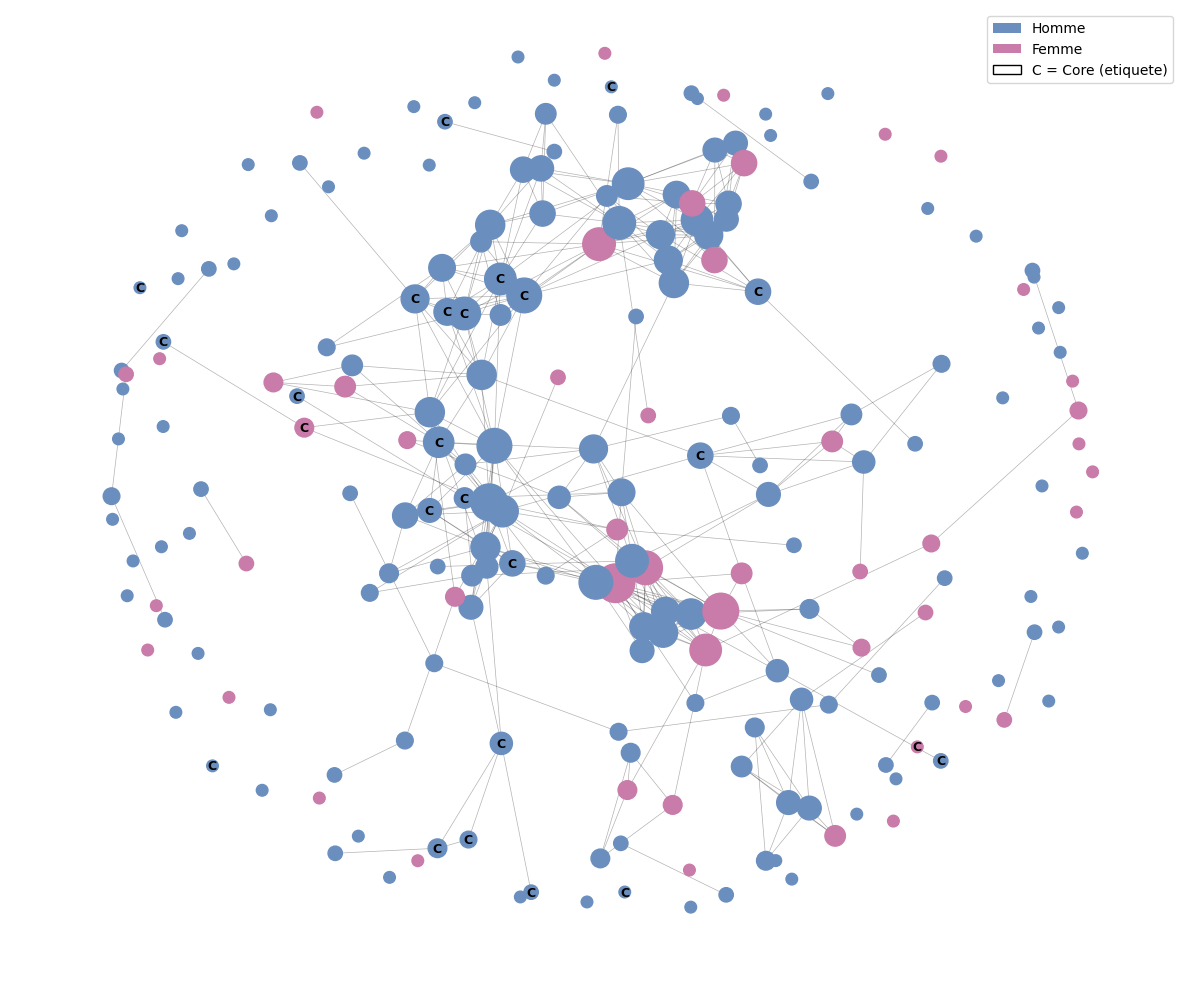

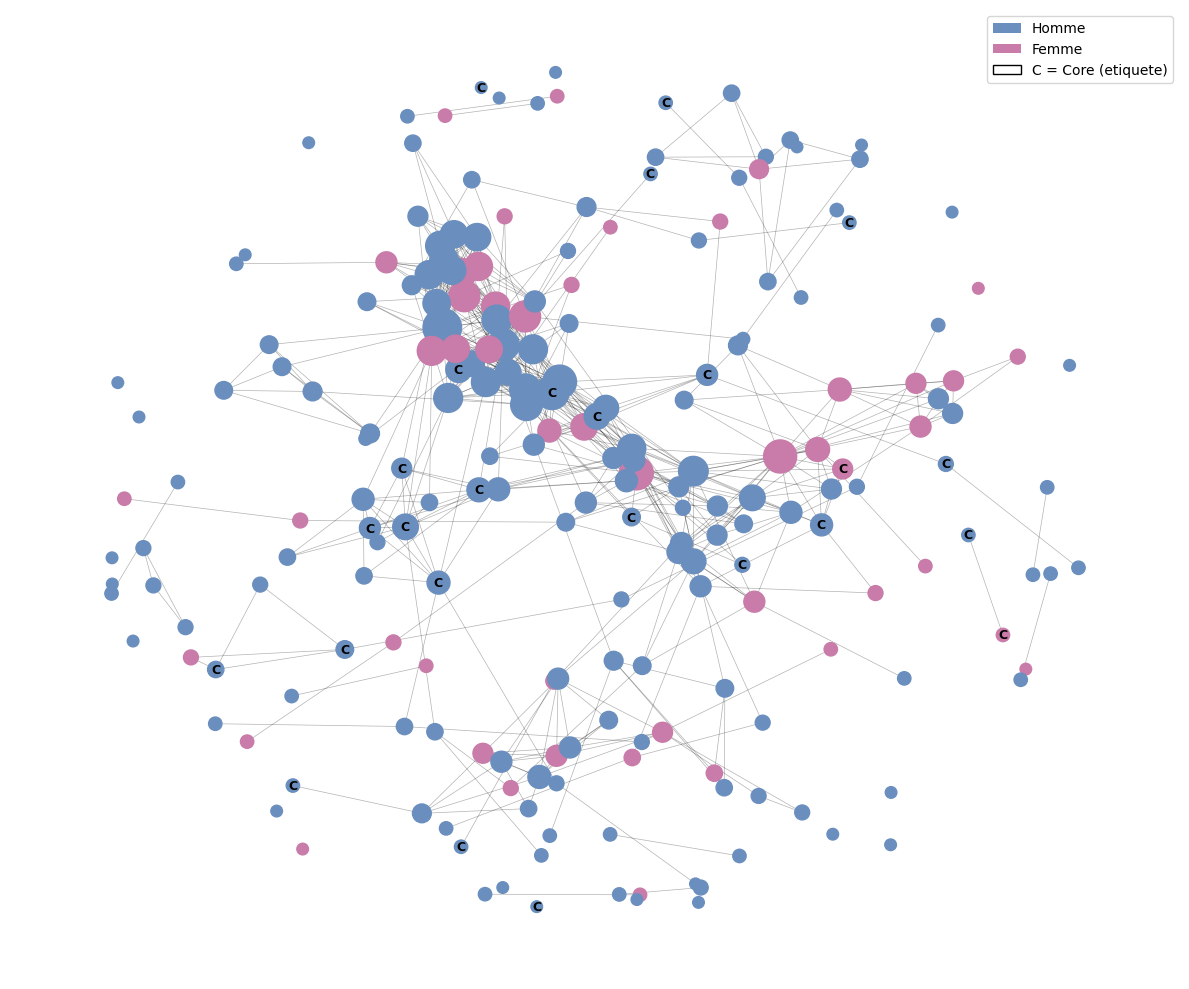

In [31]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import networkx as nx

# Graphe avant traitement
G = G_avant

# Position des noeuds avec le layout de type ressort (k controle l’espacement)
pos = nx.spring_layout(G, k=0.3)

# Couleur des noeuds selon le genre : bleu pour homme (0), rose pour femme (1)
node_colors = ['#6A8FBF' if G.nodes[n]['gender'] == 0 else '#C97BA9' for n in G.nodes]

# Taille des noeuds proportionnelle au degre (normalisee entre 70 et 770)
raw_degrees = dict(G.degree())
min_deg = min(raw_degrees.values())
max_deg = max(raw_degrees.values())
node_sizes = [70 + ((raw_degrees[n] - min_deg) / (max_deg - min_deg)) * 700 for n in G.nodes]

# Etiquette "C" en gras uniquement pour les noeuds core
labels = {n: r"$\bf{C}$" if G.nodes[n]['core'] == 1 else "" for n in G.nodes}

# Affichage du graphe avant
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)

# Legende des couleurs et du label core
legend_elements = [
    Patch(facecolor='#6A8FBF', label='Homme'),
    Patch(facecolor='#C97BA9', label='Femme'),
    Patch(facecolor='none', edgecolor='black', label='C = Core (etiquete)')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.axis('off')
plt.tight_layout()
plt.show()


# Graphe apres traitement
G = G_apres
pos = nx.spring_layout(G, k=0.3)
node_colors = ['#6A8FBF' if G.nodes[n]['gender'] == 0 else '#C97BA9' for n in G.nodes]
raw_degrees = dict(G.degree())
min_deg = min(raw_degrees.values())
max_deg = max(raw_degrees.values())
node_sizes = [70 + ((raw_degrees[n] - min_deg) / (max_deg - min_deg)) * 700 for n in G.nodes]
labels = {n: r"$\bf{C}$" if G.nodes[n]['core'] == 1 else "" for n in G.nodes}

# Affichage du graphe apres
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)

legend_elements = [
    Patch(facecolor='#6A8FBF', label='Homme'),
    Patch(facecolor='#C97BA9', label='Femme'),
    Patch(facecolor='none', edgecolor='black', label='C = Core (etiquete)')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.axis('off')
plt.tight_layout()
plt.show()

###  N - Calcul des mesures par genre et statut core

In [32]:
# === AVANT traitement ===

# Creation d’un DataFrame contenant le degre de chaque noeud
data_avant = pd.DataFrame.from_dict(dict(G_avant.degree()), orient='index', columns=['degree'])

# Ajout des attributs de genre et de core (centre) a chaque noeud
data_avant['gender'] = pd.Series(nx.get_node_attributes(G_avant, 'gender'))
data_avant['core'] = pd.Series(nx.get_node_attributes(G_avant, 'core'))

# Ajout d’une colonne booleenne indiquant si le noeud est isole (degre = 0)
data_avant['isole'] = data_avant['degree'] == 0

# Calcul des mesures de centralite pour chaque noeud
data_avant['clustering'] = pd.Series(nx.clustering(G_avant))
data_avant['betweenness'] = pd.Series(nx.betweenness_centrality(G_avant))
data_avant['closeness'] = pd.Series(nx.closeness_centrality(G_avant))

# Affichage de la moyenne des mesures par genre et statut core
print("Mesures AVANT traitement par genre + core :")
print(data_avant.groupby(['gender', 'core'])[['degree', 'isole', 'clustering', 'betweenness', 'closeness']].mean())


# === APRES traitement ===

# Meme procedure appliquee au graphe apres traitement
data_apres = pd.DataFrame.from_dict(dict(G_apres.degree()), orient='index', columns=['degree'])
data_apres['gender'] = pd.Series(nx.get_node_attributes(G_apres, 'gender'))
data_apres['core'] = pd.Series(nx.get_node_attributes(G_apres, 'core'))
data_apres['isole'] = data_apres['degree'] == 0
data_apres['clustering'] = pd.Series(nx.clustering(G_apres))
data_apres['betweenness'] = pd.Series(nx.betweenness_centrality(G_apres))
data_apres['closeness'] = pd.Series(nx.closeness_centrality(G_apres))

# Affichage des moyennes par genre et core pour les mesures calculees
print("\nMesures APRES traitement par genre + core :")
print(data_apres.groupby(['gender', 'core'])[['degree', 'isole', 'clustering', 'betweenness', 'closeness']].mean())

Mesures AVANT traitement par genre + core :
               degree     isole  clustering  betweenness  closeness
gender core                                                        
0      0     3.265734  0.349650    0.284451     0.002870   0.071164
       1     4.956522  0.173913    0.295635     0.006360   0.116053
1      0     3.021277  0.404255    0.207861     0.003511   0.068946
       1     1.500000  0.500000    0.166667     0.002391   0.079637

Mesures APRES traitement par genre + core :
               degree     isole  clustering  betweenness  closeness
gender core                                                        
0      0     5.055944  0.146853    0.431654     0.005029   0.112286
       1     5.521739  0.086957    0.347033     0.006851   0.130725
1      0     6.489362  0.063830    0.426649     0.005446   0.134205
       1     3.500000  0.000000    0.466667     0.000008   0.090218


### O - Visualisation des communautés avant et après traitement

In [34]:
## Analyse avant traitement


print("Le nombre de communautés détectées avant traitement : " + str(len(communities_avant)))

Le nombre de communautés détectées avant traitement : 91


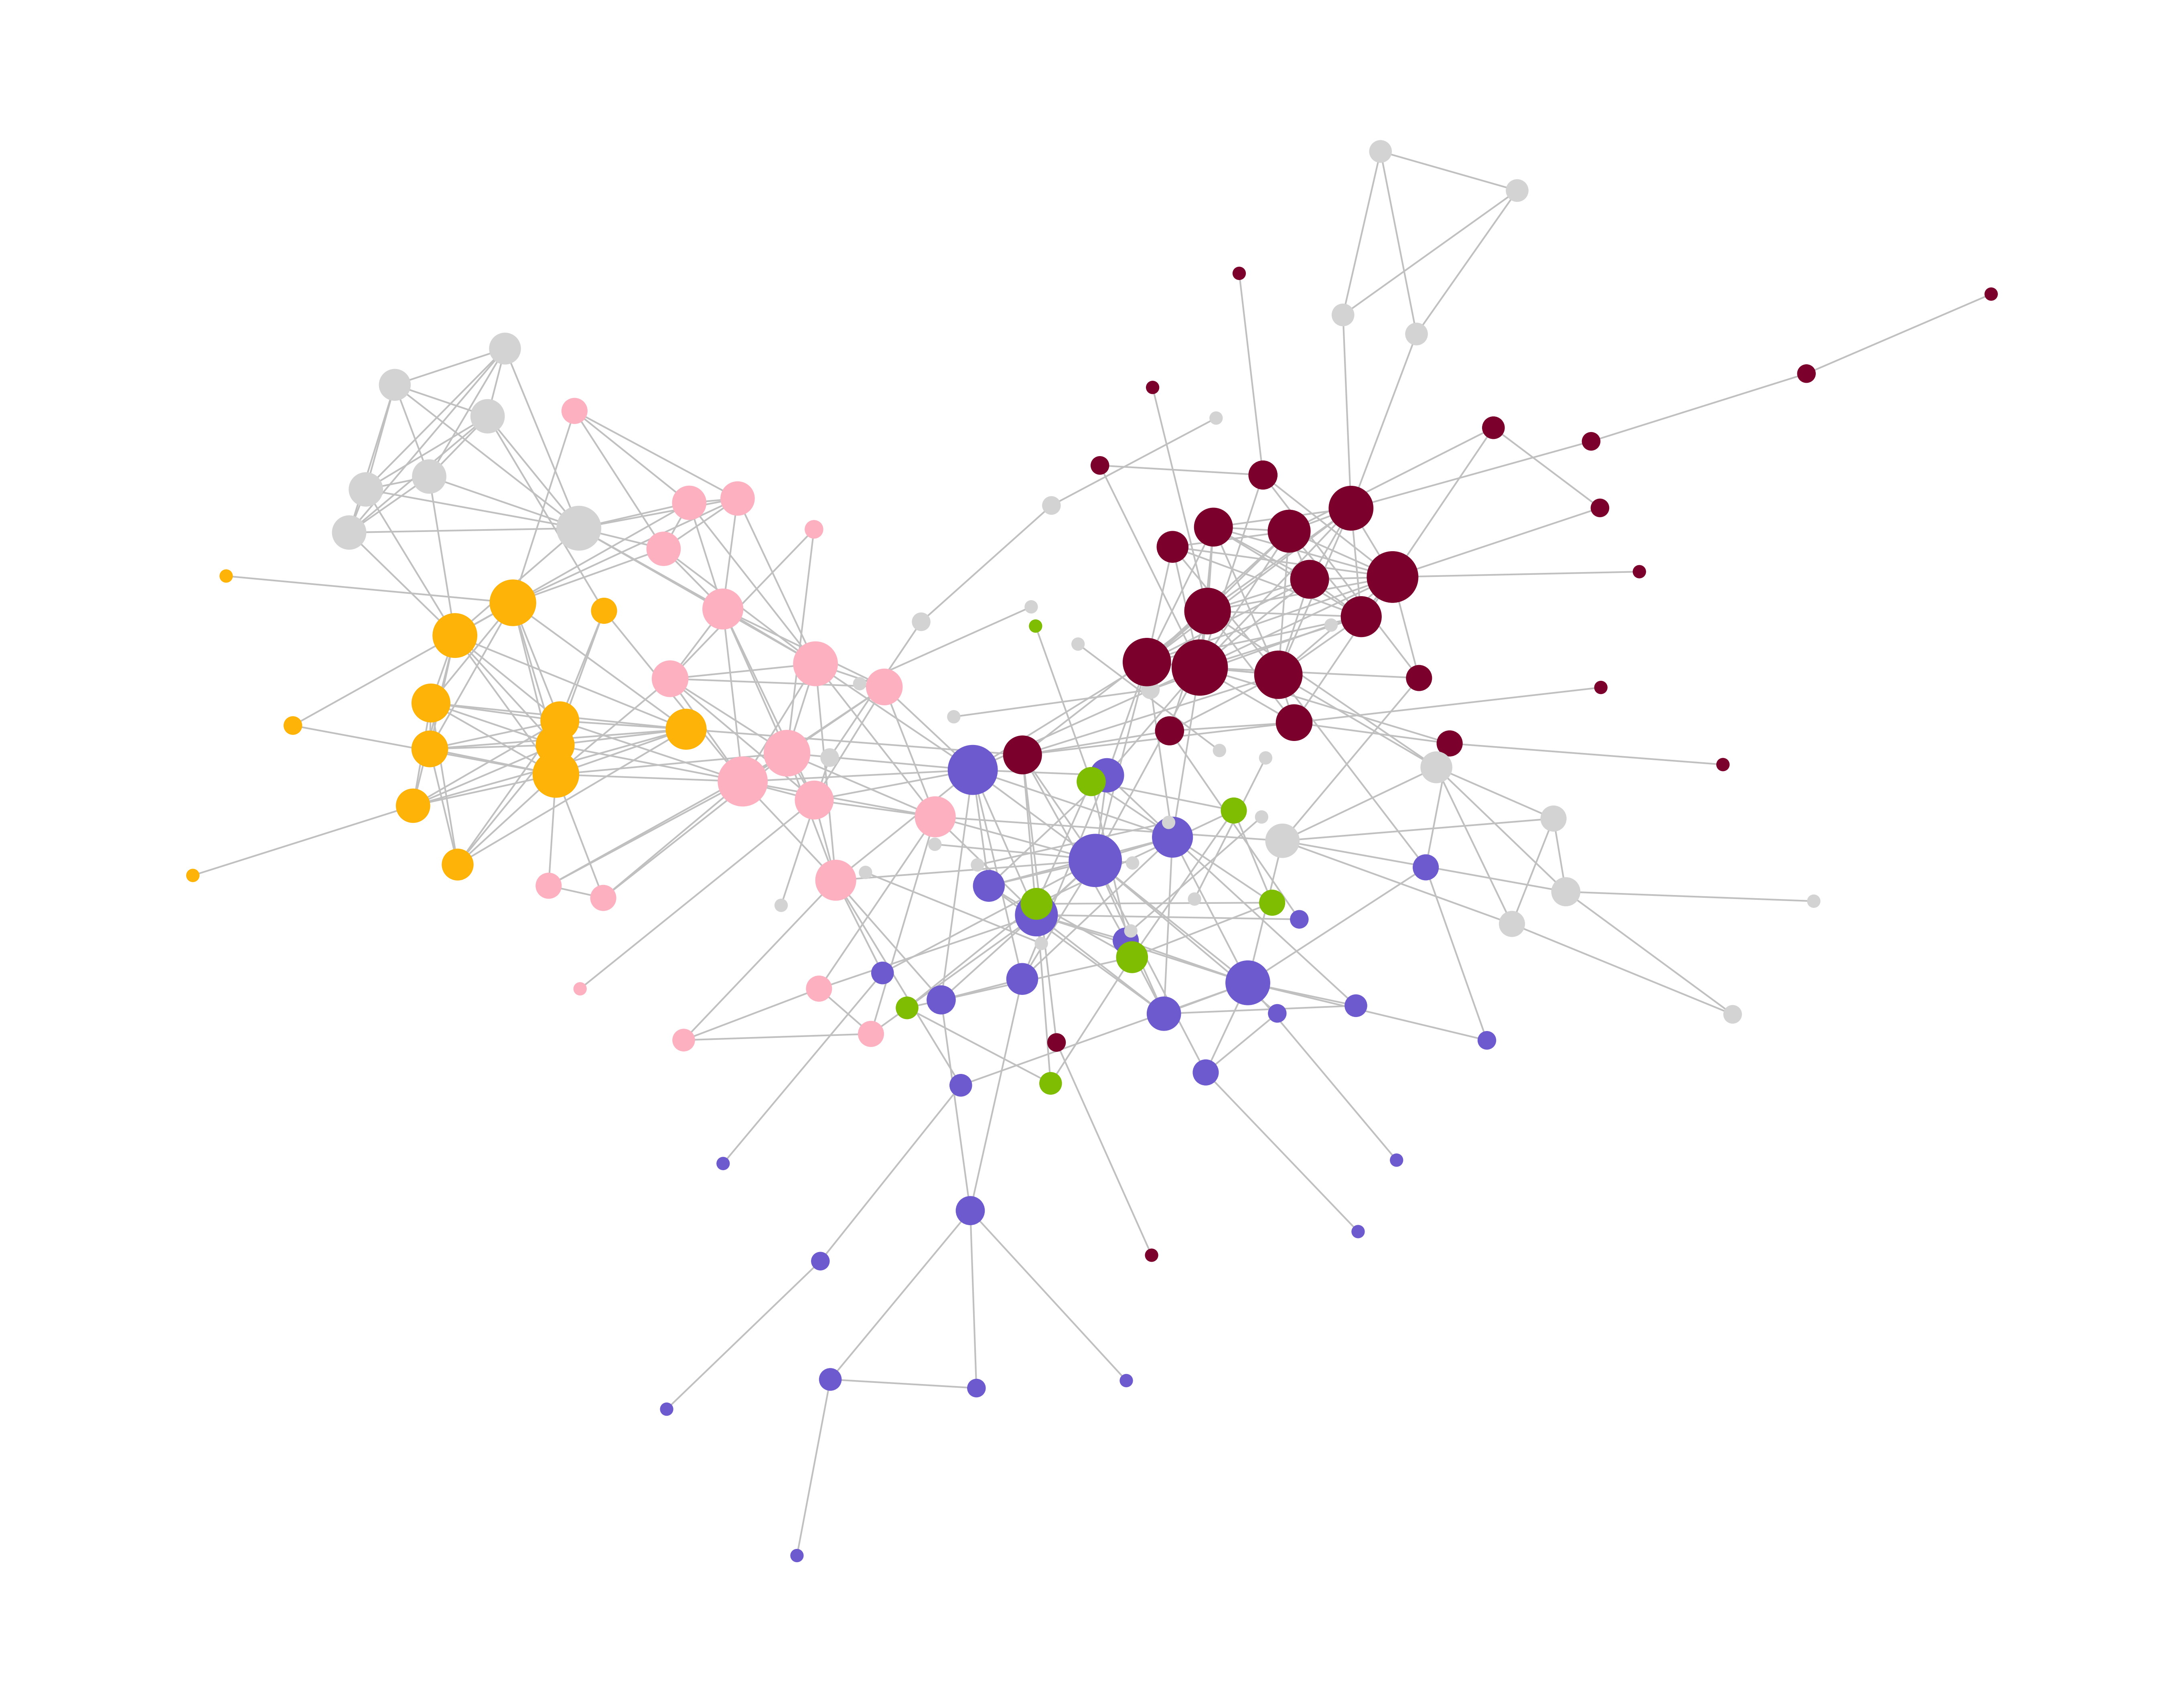

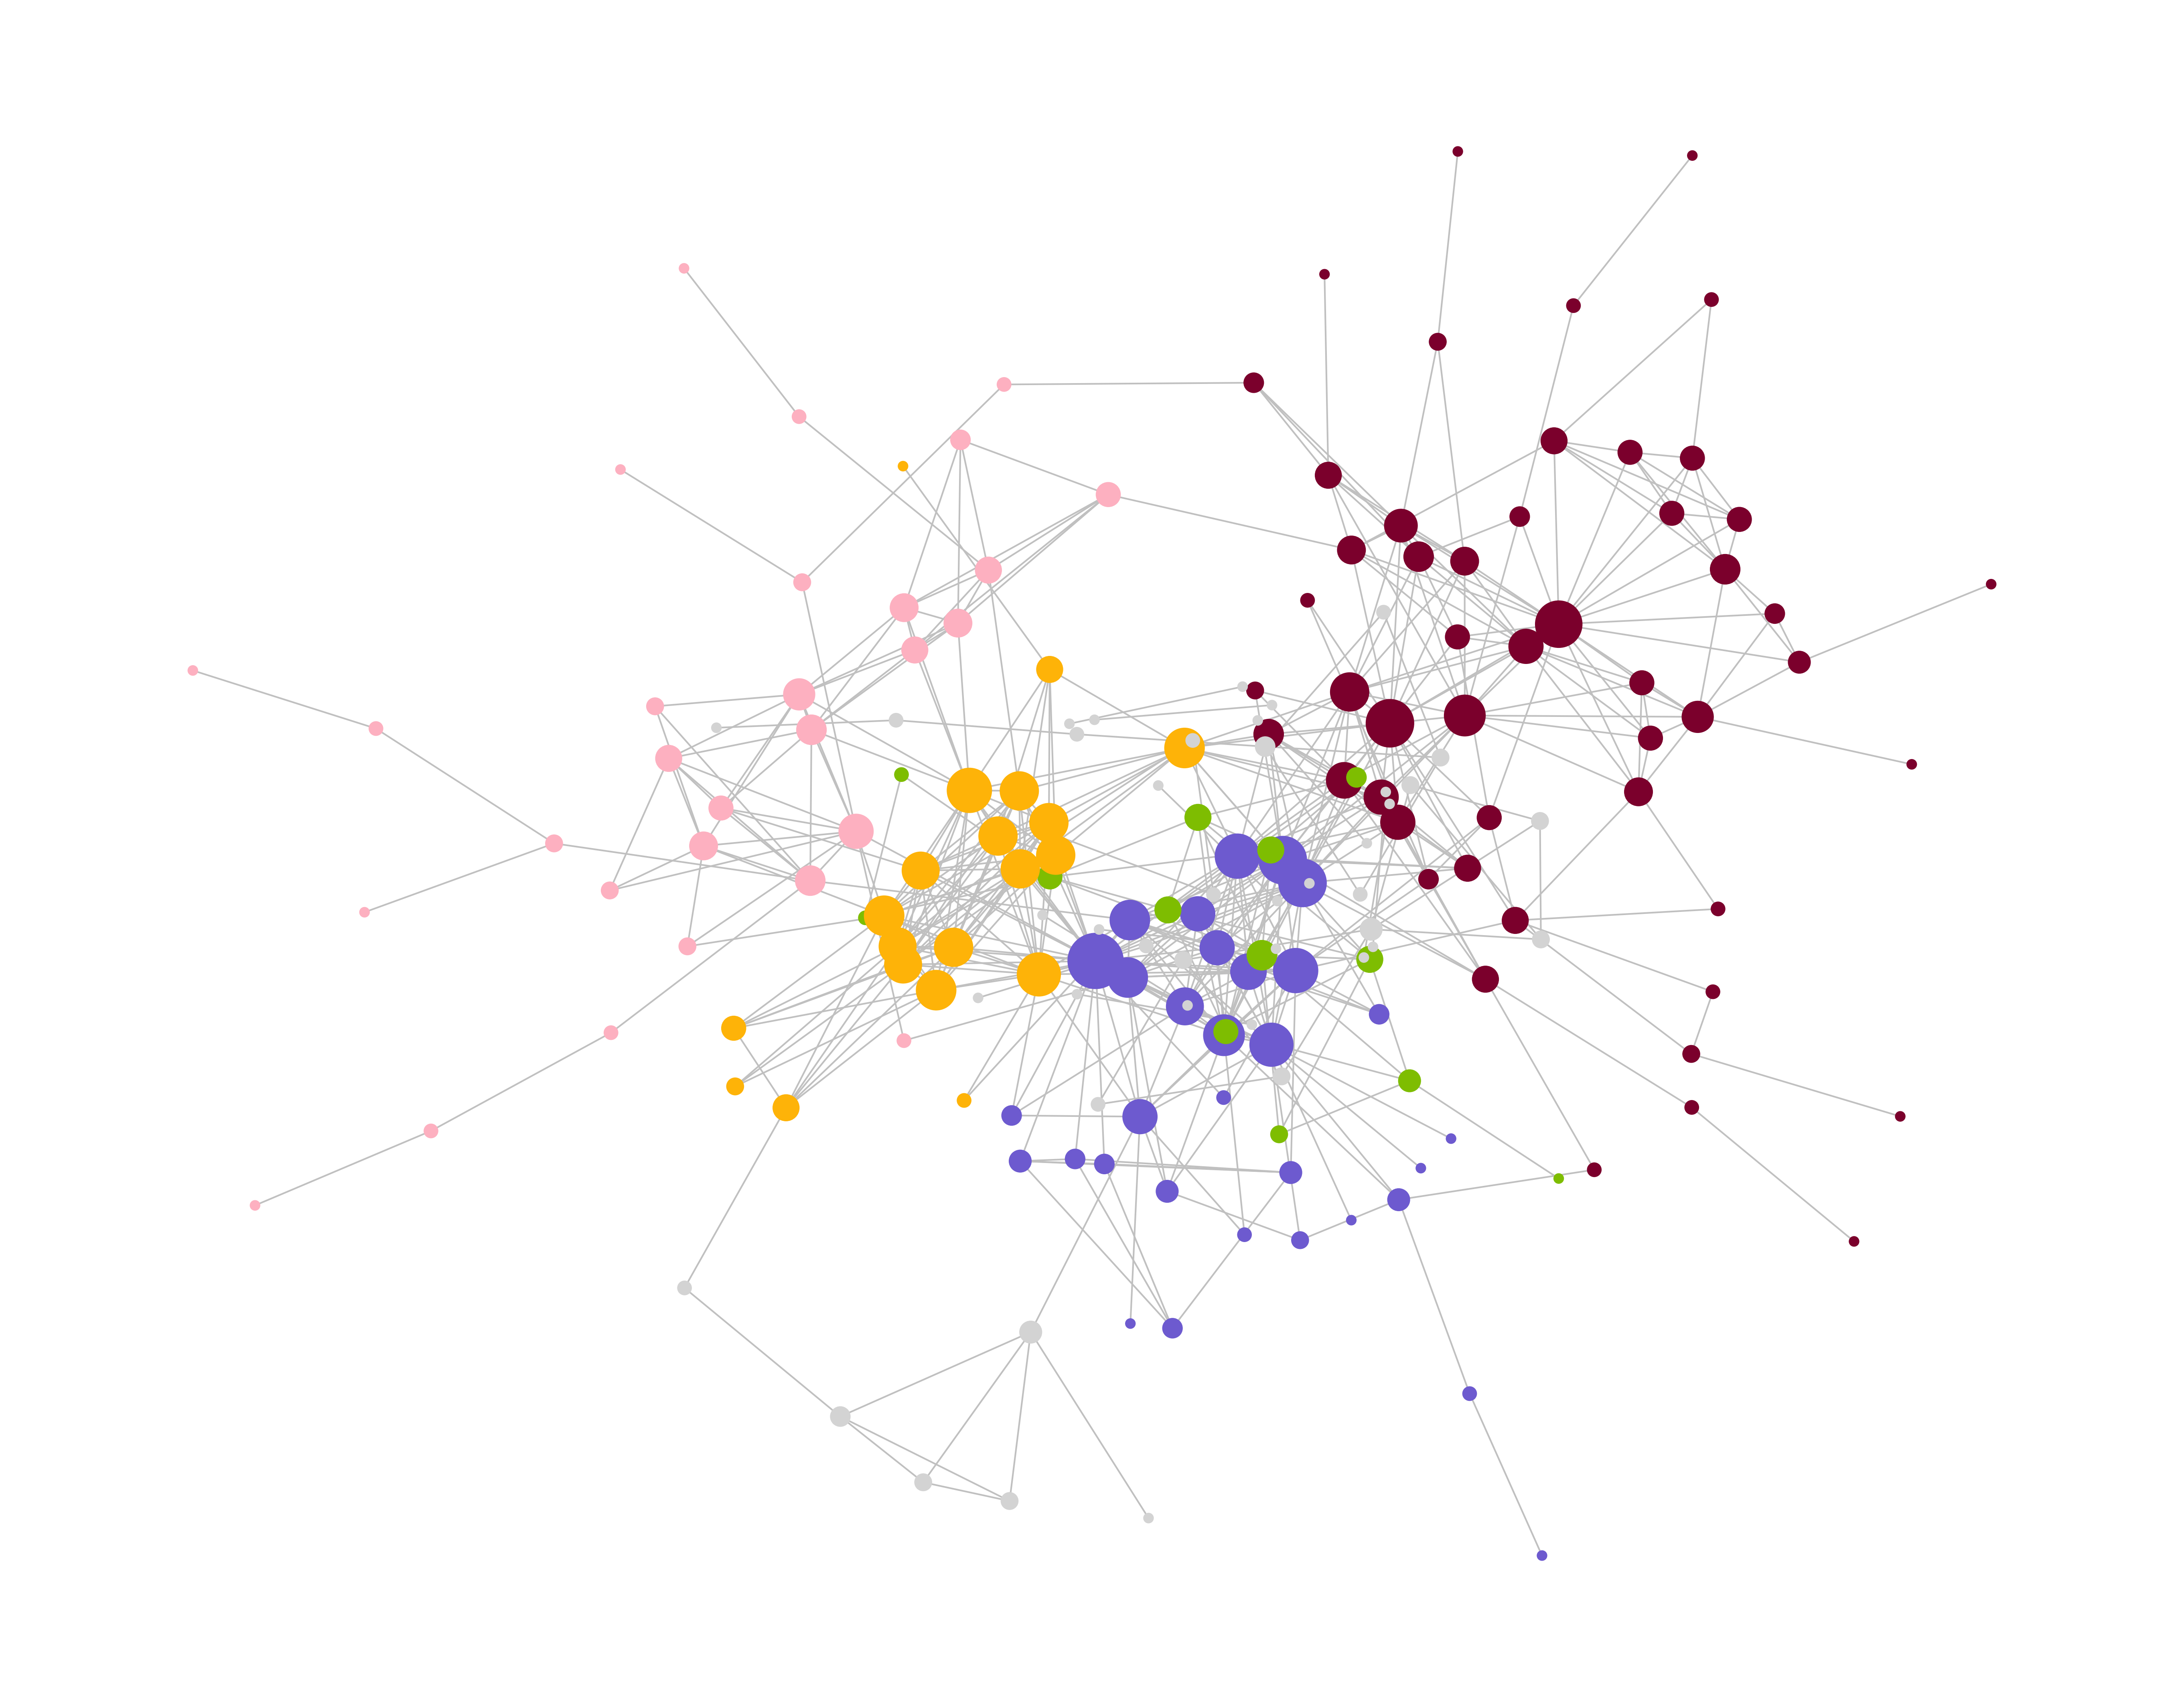

In [35]:
# === COMMUNAUTES AVANT TRAITEMENT ===
communities_avant = community.louvain_communities(G_avant, resolution=0.7, seed=123)

# Classer les communautes par taille decroissante
partition_sorted = sorted(communities_avant, key=len, reverse=True)

# Attribuer l’indice de communaute à chaque noeud
for node in G_avant.nodes:
    for i, comm in enumerate(partition_sorted):
        if node in comm:
            G_avant.nodes[node]["community"] = i + 1
            break

# Couleurs pour les 5 plus grosses communautes, sinon gris clair
node_colors = []
for node in G_avant.nodes(data=True):
    c = node[1].get("community", 0)
    if c == 1:
        node_colors.append("xkcd:bordeaux")
    elif c == 2:
        node_colors.append("xkcd:light indigo")
    elif c == 3:
        node_colors.append("xkcd:soft pink")
    elif c == 4:
        node_colors.append("xkcd:amber")
    elif c == 5:
        node_colors.append("xkcd:dark lime green")
    else:
        node_colors.append("lightgrey")

# Positionnement des noeuds
pos = nx.kamada_kawai_layout(G_avant)

# Taille des noeuds selon le degre (normalisee)
degrees = dict(G_avant.degree())
min_deg = min(degrees.values())
max_deg = max(degrees.values())
degrees_norm = {n: (v - min_deg) / (max_deg - min_deg) * 10000 for n, v in degrees.items()}

# Affichage du graphe
plt.figure(figsize=(70, 55))
nx.draw_networkx(
    G_avant,
    pos=pos,
    node_color=node_colors,
    node_size=[degrees_norm[n] for n in G_avant.nodes],
    edge_color='silver',
    width=3.0,
    with_labels=False
)
plt.axis('off')
plt.show()


# === COMMUNAUTES APRES TRAITEMENT ===

# Detection des communautes par Louvain
communities_apres = community.louvain_communities(G_apres, resolution=0.7, seed=123)

# Classer les communautes par taille decroissante
partition_sorted = sorted(communities_apres, key=len, reverse=True)

# Attribuer l’indice de communaute à chaque noeud
for node in G_apres.nodes:
    for i, comm in enumerate(partition_sorted):
        if node in comm:
            G_apres.nodes[node]["community"] = i + 1
            break

# Couleurs pour les 5 plus grosses communautes, sinon gris clair
node_colors = []
for node in G_apres.nodes(data=True):
    c = node[1].get("community", 0)
    if c == 1:
        node_colors.append("xkcd:bordeaux")
    elif c == 2:
        node_colors.append("xkcd:light indigo")
    elif c == 3:
        node_colors.append("xkcd:soft pink")
    elif c == 4:
        node_colors.append("xkcd:amber")
    elif c == 5:
        node_colors.append("xkcd:dark lime green")
    else:
        node_colors.append("lightgrey")

# Position des noeuds
pos = nx.kamada_kawai_layout(G_apres)

# Taille des noeuds selon le degre (normalisee)
degrees = dict(G_apres.degree())
min_deg = min(degrees.values())
max_deg = max(degrees.values())
degrees_norm = {n: (v - min_deg) / (max_deg - min_deg) * 10000 for n, v in degrees.items()}

# Affichage du graphe
plt.figure(figsize=(70, 55))
nx.draw_networkx(
    G_apres,
    pos=pos,
    node_color=node_colors,
    node_size=[degrees_norm[n] for n in G_apres.nodes],
    edge_color='silver',
    width=3.0,
    with_labels=False
)
plt.axis('off')
plt.show()